In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def normal_density( x, mu, sigma2):
    """
    :param x: sample data (2theta)
    :param mu: mean (μi)
    :param sigma2: variance (σi^2)
    :return: Return the probability density of Normal distribution x~N(μi,σi^2)
    """
    density = (1 / np.sqrt(2 * np.pi * sigma2)) * np.exp(-((x - mu) ** 2) / (2 * sigma2))
    return density

# Lorenz distribution
def lorenz_density( x, mu, gamma):
    """
    :param x: sample data (2theta)
    :param mu: mean (μi)
    :param gamma: FWHM of Lorenz distribution
    :return: Return the probability density of Lorenz distribution
    """
    density = (1 / np.pi) * (gamma / ((x - mu) ** 2 + gamma ** 2))
    return density

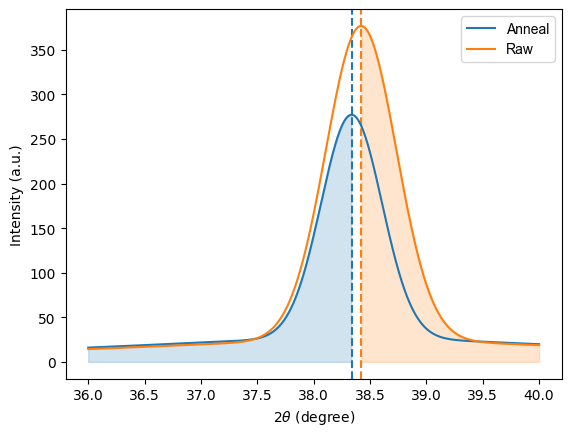

In [4]:
# 退火后
x = np.linspace(36, 40, 1000)
w_i = 411.5263544
A_i = 0.586981106
w_l = w_i * A_i
mu = 38.33606199
gamma = 2.928749109
w_g = w_i * (1-A_i)
sigma2 = 0.073065025
y1 = w_l * lorenz_density(x, mu, gamma) + w_g * normal_density(x, mu, sigma2)
# fwhm : 0.18252

# 退火前
w_i = 498.5835565
A_i = 0.446040094
w_l = w_i * A_i
mu = 38.42096476
gamma = 2.916827607
w_g = w_i * (1-A_i)
sigma2 = 0.097733987
y2 = w_l * lorenz_density(x, mu, gamma) + w_g * normal_density(x, mu, sigma2)
# fwhm : 0.218884


plt.fill_between(x[x < 38.33606199], y1[x < 38.33606199], color='#1f77b4', alpha=0.2)
plt.fill_between(x[x > 38.42096476], y2[x > 38.42096476], color='#ff7f0e', alpha=0.2)
plt.rcParams["font.family"] = "Arial"
plt.axvline(x=38.33606199, color='#1f77b4', linestyle='--')
plt.axvline(x=38.42096476, color='#ff7f0e', linestyle='--')

plt.plot(x,y1,color='#1f77b4', label='Anneal')
plt.plot(x,y2,color='#ff7f0e', label='Raw')
plt.xlabel('2$\\theta$ (degree)')
plt.ylabel('Intensity (a.u.)')
plt.legend()
plt.savefig('Compare.png',dpi=800)
plt.show()

In [14]:
strain_1 = 0.219 / 4 /np.tan(38.42/2)
strain_1

0.1452601680642669

In [15]:
strain_2 = 0.183 / 4 /np.tan(38.34/2)
strain_2

0.1378500649932785

In [16]:
(strain_1 - strain_2) / strain_2

0.05375480288202762